In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,roc_auc_score

In [2]:
pd.set_option('display.max_columns', None)
dataset=pd.read_csv(r"C:\Users\Anindita\Desktop\Project\diabetes_binary_health_indicators_BRFSS2015.csv")

In [3]:
dataset.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,40,1,0,0,0,0,1,0,1,0,5,18,15,1,0,9,4,3
1,0,0,0,0,25,1,0,0,1,0,0,0,0,1,3,0,0,0,0,7,6,1
2,0,1,1,1,28,0,0,0,0,1,0,0,1,1,5,30,30,1,0,9,4,8
3,0,1,0,1,27,0,0,0,1,1,1,0,1,0,2,0,0,0,0,11,3,6
4,0,1,1,1,24,0,0,0,1,1,1,0,1,0,2,3,0,0,0,11,5,4


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   Diabetes_binary       253680 non-null  int64
 1   HighBP                253680 non-null  int64
 2   HighChol              253680 non-null  int64
 3   CholCheck             253680 non-null  int64
 4   BMI                   253680 non-null  int64
 5   Smoker                253680 non-null  int64
 6   Stroke                253680 non-null  int64
 7   HeartDiseaseorAttack  253680 non-null  int64
 8   PhysActivity          253680 non-null  int64
 9   Fruits                253680 non-null  int64
 10  Veggies               253680 non-null  int64
 11  HvyAlcoholConsump     253680 non-null  int64
 12  AnyHealthcare         253680 non-null  int64
 13  NoDocbcCost           253680 non-null  int64
 14  GenHlth               253680 non-null  int64
 15  MentHlth              253680 non-n

In [5]:
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Diabetes_binary,253680.0,0.139333,0.346294,0.0,0.0,0.0,0.0,1.0
HighBP,253680.0,0.429001,0.494934,0.0,0.0,0.0,1.0,1.0
HighChol,253680.0,0.424121,0.494210,0.0,0.0,0.0,1.0,1.0
CholCheck,253680.0,0.962670,0.189571,0.0,1.0,1.0,1.0,1.0
BMI,253680.0,28.382364,6.608694,12.0,24.0,27.0,31.0,98.0
Smoker,253680.0,0.443169,0.496761,0.0,0.0,0.0,1.0,1.0
Stroke,253680.0,0.040571,0.197294,0.0,0.0,0.0,0.0,1.0
HeartDiseaseorAttack,253680.0,0.094186,0.292087,0.0,0.0,0.0,0.0,1.0
PhysActivity,253680.0,0.756544,0.429169,0.0,1.0,1.0,1.0,1.0
Fruits,253680.0,0.634256,0.481639,0.0,0.0,1.0,1.0,1.0


In [6]:
dataset['Diabetes_binary'].value_counts()

0    218334
1     35346
Name: Diabetes_binary, dtype: int64

<AxesSubplot: >

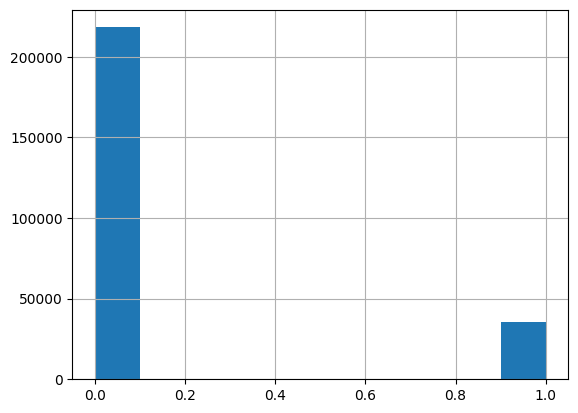

In [7]:
dataset['Diabetes_binary'].hist()

In [8]:
x = dataset.iloc[:,1:21]
y = dataset.iloc[:,0]

print(x.shape)
print(y.shape)
print(x.columns)

(253680, 20)
(253680,)
Index(['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education'],
      dtype='object')


In [9]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=100)
print("\n")
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))
print("\n")



Training set has 177576 samples.
Testing set has 76104 samples.




In [10]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Decision Tree

In [12]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [14]:
dt_train_predictions = dt_model.predict(X_train)
print("Decision Tree:")
print("For Training data:")
print("Accuracy:", accuracy_score(y_train, dt_train_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_train, dt_train_predictions))
print("Classification Report:\n", classification_report(y_train, dt_train_predictions))

dt_test_predictions = dt_model.predict(X_test)
print("\nDecision Tree:")
print("For Testing data:")
print("Accuracy:", accuracy_score(y_test, dt_test_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, dt_test_predictions))
print("Classification Report:\n", classification_report(y_test, dt_test_predictions))

Decision Tree:
For Training data:
Accuracy: 0.9882303914943461
Confusion Matrix:
 [[152937     90]
 [  2000  22549]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99    153027
           1       1.00      0.92      0.96     24549

    accuracy                           0.99    177576
   macro avg       0.99      0.96      0.97    177576
weighted avg       0.99      0.99      0.99    177576


Decision Tree:
For Testing data:
Accuracy: 0.7998002733102071
Confusion Matrix:
 [[57405  7902]
 [ 7334  3463]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.88      0.88     65307
           1       0.30      0.32      0.31     10797

    accuracy                           0.80     76104
   macro avg       0.60      0.60      0.60     76104
weighted avg       0.80      0.80      0.80     76104



Support Vector Machine

In [15]:
classifier = SVC(kernel = 'linear', random_state = 100)
classifier.fit(X_train, y_train)
Y_Pred = classifier.predict(X_test)

In [16]:
cm = confusion_matrix(y_test, Y_Pred)

In [17]:
svm_train_predictions = classifier.predict(X_train)
print("Support Vector Machine:")
print("For Training data:")
print("Accuracy:", accuracy_score(y_train, svm_train_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_train, svm_train_predictions))
print("Classification Report:\n", classification_report(y_train, svm_train_predictions))

Support Vector Machine:
For Training data:
Accuracy: 0.8617549668874173
Confusion Matrix:
 [[153027      0]
 [ 24549      0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      1.00      0.93    153027
           1       0.00      0.00      0.00     24549

    accuracy                           0.86    177576
   macro avg       0.43      0.50      0.46    177576
weighted avg       0.74      0.86      0.80    177576



c:\Users\Anindita\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Anindita\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Anindita\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

In [18]:
svm_test_predictions = classifier.predict(X_test)
print("\nSupport Vector Machine:")
print("For Testing data:")
print("Accuracy:", accuracy_score(y_test, svm_test_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, svm_test_predictions))
print("Classification Report:\n", classification_report(y_test, svm_test_predictions))


Support Vector Machine:
For Testing data:
Accuracy: 0.8581283506780195
Confusion Matrix:
 [[65307     0]
 [10797     0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      1.00      0.92     65307
           1       0.00      0.00      0.00     10797

    accuracy                           0.86     76104
   macro avg       0.43      0.50      0.46     76104
weighted avg       0.74      0.86      0.79     76104



c:\Users\Anindita\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Anindita\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Anindita\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

K Nearest Neighbors

In [19]:
knn = KNeighborsClassifier(n_neighbors=98, metric='euclidean')
knn.fit(X_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=98)

In [20]:
knn_train_predictions = knn.predict(X_train)
print("K Nearest Neighbors:")
print("For Training data:")
print("Accuracy:", accuracy_score(y_train, knn_train_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_train, knn_train_predictions))
print("Classification Report:\n", classification_report(y_train, knn_train_predictions))

K Nearest Neighbors:
For Training data:
Accuracy: 0.8656462585034014
Confusion Matrix:
 [[152046    981]
 [ 22877   1672]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.99      0.93    153027
           1       0.63      0.07      0.12     24549

    accuracy                           0.87    177576
   macro avg       0.75      0.53      0.53    177576
weighted avg       0.84      0.87      0.82    177576



In [21]:
knn_test_predictions = knn.predict(X_test)
print("\nK Nearest Neighbors:")
print("For Testing data:")
print("Accuracy:", accuracy_score(y_test, knn_test_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, knn_test_predictions))
print("Classification Report:\n", classification_report(y_test, knn_test_predictions))


K Nearest Neighbors:
For Testing data:
Accuracy: 0.8617812467150215
Confusion Matrix:
 [[64885   422]
 [10097   700]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.99      0.93     65307
           1       0.62      0.06      0.12     10797

    accuracy                           0.86     76104
   macro avg       0.74      0.53      0.52     76104
weighted avg       0.83      0.86      0.81     76104

